# 01 - EDA Airline Passenger Satisfaction✈️ — ML Classification 

En este notebook vamos a explorar el dataset de satisfacción de pasajeros de aerolíneas.

El objetivo es:
- Comprender la estructura y características del dataset.
- Detectar valores nulos, duplicados y outliers.
- Analizar la distribución de las variables principales.
- Identificar relaciones entre variables.
- Dejar el dataset limpio para su posterior uso en modelado (modelos predictivos).

## **Paso 1. Cargar librerías y dataset**
Importamos las librerías de análisis y visualización que vamos a usar:

* pandas → manipulación de datos.
* matplotlib/seaborn → visualizaciones estáticas.
* plotly → gráficos interactivos.
* sklean → herramientas ML y DS.
* missingno → visualización de datos nulos
* StandardScaler from scikit learn.preprocessing → Escalado de variables

Carga del dataset: ""../data/airline_passenger_satisfaction.csv"

In [254]:
# ===================================
# 1. Import libraries
# ===================================


import pandas as pd                                                             # Data analysis and  Manipulación de datos y análisis
import numpy as np                                                              # Cálculos numéricos                               
import matplotlib.pyplot as plt                                                 # Gráficos básicos (histogramas, scatter, etc.).
import seaborn as sns                                                           # Gráficos estadísticos con menos código (heatmaps, distribuciones…)
import missingno as msno                                                        # Visualización de datos faltantes
from sklearn.preprocessing import StandardScaler, MinMaxScaler                  # Escalado de variables (normalización y estandarización)
import os                                                                       # Interacción con el sistema operativo
from IPython.display import display, Markdown                                   # Mejorar la visualización en Jupyter Notebooks



# Configuración de estilo general para gráficos
sns.set_style("whitegrid")
plt.rcParams.update({"figure.figsize": (8,5), "axes.titlesize": 14, "axes.labelsize": 12})



# ===================================
# Cargar dataset original
# (el archivo debe estar en la carpeta data/)
# ===================================

# Define la ruta del archivo sin procesar
df = pd.read_csv("../data/airline_passenger_satisfaction.csv")
df.head(5)   # las primeras 5 filas del dataframe

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


## **Paso 2. EDA inicial: Información básica**

En este bloque realizamos una **exploración general del dataset**:
- Revisamos las primeras filas para entender la estructura de los datos.
- Comprobamos el número de filas y columnas.
- Inspeccionamos el tipo de variables (numéricas y categóricas).
- Eliminamos columnas irrelevantes (`Unnamed: 0`, `id`), que son identificadores o índices exportados accidentalmente.


Este paso es clave para familiarizarnos con el dataset y planificar los siguientes pasos de limpieza y preprocesamiento.

In [255]:
# ===================================
# 2. EDA inicial: Información básica
# ===================================

# Conocer la estructura básica
# Dimensiones
print("Tamaño del dataset:", df.shape)

# Información general
print("\nInformación del dataset:\n")
df.info()

# Separador visual
print("\n" + "="*50 + "\n")

# Limpiar espacios en nombres de columnas
df.columns = df.columns.str.strip()


# Eliminar columnas irrelevantes si existen
cols_to_drop = ["Unnamed: 0", "id"]
# Detectar cuáles de esas columnas existen realmente en el DataFrame
existing_cols_to_drop = [col for col in cols_to_drop if col in df.columns]

# Mostrar las que se van a eliminar
print("Columnas a eliminar:", existing_cols_to_drop)

# Eliminar solo si existen
if existing_cols_to_drop:
    df = df.drop(columns=existing_cols_to_drop)
    print("Columnas eliminadas correctamente.")
else:
    print("No se encontraron columnas irrelevantes para eliminar.")

# Dimensiones
print("Tamaño del dataset tras eliminar columnas irrelevantes:", df.shape)

# Estadísticas básicas
df.describe(include="all").T





Tamaño del dataset: (103904, 25)

Información del dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 no

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Gender,103904,2,Female,52727,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer Type,103904,2,Loyal Customer,84923,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,103904.0,NaN,NaN,NaN,39.379706,15.114964,7.0,27.0,40.0,51.0,85.0
Type of Travel,103904,2,Business travel,71655,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Class,103904,3,Business,49665,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Flight Distance,103904.0,NaN,NaN,NaN,1189.448375,997.147281,31.0,414.0,843.0,1743.0,4983.0
Inflight wifi service,103904.0,NaN,NaN,NaN,2.729683,1.327829,0.0,2.0,3.0,4.0,5.0
Departure/Arrival time convenient,103904.0,NaN,NaN,NaN,3.060296,1.525075,0.0,2.0,3.0,4.0,5.0
Ease of Online booking,103904.0,NaN,NaN,NaN,2.756901,1.398929,0.0,2.0,3.0,4.0,5.0
Gate location,103904.0,NaN,NaN,NaN,2.976883,1.277621,0.0,2.0,3.0,4.0,5.0


## **Paso 3. Valores faltantes y duplicados**

En este paso analizamos la **calidad del dataset**:
- Detectamos columnas con **valores nulos o faltantes**,  
  que pueden afectar el entrenamiento de los modelos.
- Identificamos **filas duplicadas**, que pueden generar sesgos o inflar el tamaño de la muestra.  



Valores nulos por columna (top 10):

Arrival Delay in Minutes             310
Customer Type                          0
Gender                                 0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Age                                    0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Gate location                          0
Ease of Online booking                 0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
Food and drink                         0
On-board service                       0
Leg room service                       0
Checkin service                        0
Baggage handling                       0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
satisfaction                           0
dtype: int64

Númer

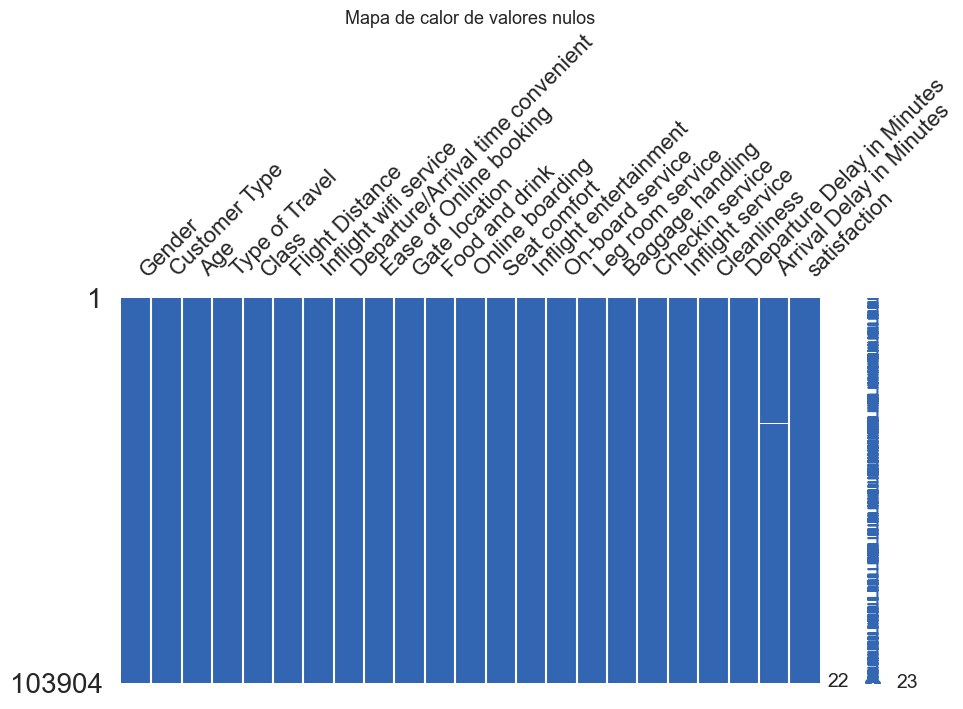


**💬 Interpretación visual:**

- Cada **columna** del gráfico representa una variable del dataset.  
- Las **líneas continuas** indican registros completos (sin nulos).  
- Las **interrupciones o franjas blancas** muestran valores faltantes.  
- En este dataset, se observa que los valores nulos son **muy pocos y concentrados**  
  en columnas específicas (por ejemplo, *Arrival Delay in Minutes*).  
- Este análisis permite decidir si los nulos deben **rellenarse (imputación)** o **eliminarse**,  
  evitando pérdida de información relevante o sesgos en los modelos.


In [256]:
# ===================================
# 3. Valores nulos y duplicados
# Identificamos columnas con valores nulos y registros duplicados.
# ===================================


# Valores nulos
print("\nValores nulos por columna (top 10):\n")
print(df.isnull().sum().sort_values(ascending=False))



# Duplicados
dupes = df.duplicated().sum()
print(f"\nNúmero de filas duplicadas: {dupes}")



# Visualización de nulos con missingno


# Mapa de calor de nulos
msno.matrix(df, figsize=(10, 5), color=(0.2, 0.4, 0.7))
plt.title("Mapa de calor de valores nulos", fontsize=13)
plt.show()


# --- Comentario interpretativo ---
display(Markdown(
"""
**💬 Interpretación visual:**

- Cada **columna** del gráfico representa una variable del dataset.  
- Las **líneas continuas** indican registros completos (sin nulos).  
- Las **interrupciones o franjas blancas** muestran valores faltantes.  
- En este dataset, se observa que los valores nulos son **muy pocos y concentrados**  
  en columnas específicas (por ejemplo, *Arrival Delay in Minutes*).  
- Este análisis permite decidir si los nulos deben **rellenarse (imputación)** o **eliminarse**,  
  evitando pérdida de información relevante o sesgos en los modelos.
"""
))


## **Paso 4: Distribución de la variable objetivo**

Analizamos la **variable objetivo** `satisfaction` para conocer el grado de satisfacción de los pasajeros.  
Esto permite detectar posibles **desequilibrios de clases**, algo fundamental para la elección  
y evaluación de los modelos de clasificación.

El dataset clasifica a los pasajeros como:
- **Satisfied** → Clientes satisfechos.  
- **Neutral or dissatisfied** → Clientes neutrales o insatisfechos.

Dado que se trata de una variable **categórica binaria**, no tiene sentido aplicar una estimación de densidad (KDE),
ya que ésta se utiliza únicamente con variables continuas.

Analizamos si las clases están equilibradas o existe un desbalance en términos de satisfacción de pasajeros.


🔍 **Interpretación:**  
El conjunto de datos muestra una ligera diferencia entre pasajeros satisfechos y no satisfechos.  
El leve desbalance no es crítico, pero conviene tenerlo presente en la fase de modelado (por ejemplo, ajustando pesos de clase 
en algoritmos sensibles al desbalance).



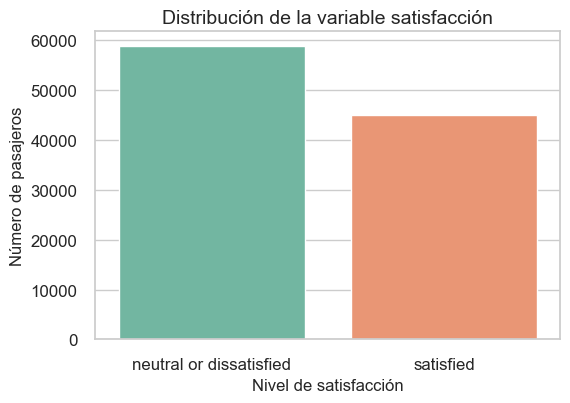

Proporción de clases (%):
 satisfaction
neutral or dissatisfied    56.666731
satisfied                  43.333269
Name: proportion, dtype: float64



**💬 Interpretación visual:**

- Se observa que la clase **“neutral or dissatisfied”** tiene una proporción ligeramente mayor  
  que la clase **“satisfied”**, lo que indica un **desbalanceo moderado** en el dataset.  
- Este desequilibrio debe considerarse durante el entrenamiento para evitar que el modelo  
  **favorezca la clase mayoritaria**.  
- En fases posteriores, se puede mitigar este efecto mediante técnicas como:
  - Ajuste de pesos (`class_weight='balanced'` en modelos lineales).  
  - Submuestreo o sobremuestreo de clases.  
  - Evaluación con métricas adecuadas (*F1-score*, *ROC-AUC*) en lugar de solo *accuracy*.


In [257]:
# ===================================
# 4. Distribución de la variable objetivo "satisfaction"  
# ===================================

# Definir variable objetivo
target_col = "satisfaction"

# Representar la distribución de la variable objetivo (correcto)
plt.figure(figsize=(6,4))
sns.countplot(data=df, x=target_col, hue=target_col, palette="Set2", legend=False)
plt.title("Distribución de la variable satisfacción")
plt.xlabel("Nivel de satisfacción")
plt.ylabel("Número de pasajeros")
plt.show()

# Mostrar proporciones numéricas
print("Proporción de clases (%):\n", df[target_col].value_counts(normalize=True) * 100)

# --- Comentario interpretativo ---
display(Markdown(
"""
**💬 Interpretación visual:**

- Se observa que la clase **“neutral or dissatisfied”** tiene una proporción ligeramente mayor  
  que la clase **“satisfied”**, lo que indica un **desbalanceo moderado** en el dataset.  
- Este desequilibrio debe considerarse durante el entrenamiento para evitar que el modelo  
  **favorezca la clase mayoritaria**.  
- En fases posteriores, se puede mitigar este efecto mediante técnicas como:
  - Ajuste de pesos (`class_weight='balanced'` en modelos lineales).  
  - Submuestreo o sobremuestreo de clases.  
  - Evaluación con métricas adecuadas (*F1-score*, *ROC-AUC*) en lugar de solo *accuracy*.
"""
))

## **Paso 5: Relación satisfacción - tipo de viaje y tipo de cliente**

En este análisis comparamos la **satisfacción de los pasajeros** en función de:
- **Tipo de viaje** (*Business vs Personal Travel*)  
- **Tipo de cliente** (*Recurrent vs First-time*)

Estos gráficos ayudan a identificar patrones de comportamiento y subgrupos  
donde la satisfacción varía significativamente.

Comprobamos cómo varía la satisfacción según el tipo de viaje (negocios o personal)
y si el pasajero es un **Cliente fidelizado** (Loyal client o habitual) o un **Cliente no fidelizado** (Disloyal client u ocasional).

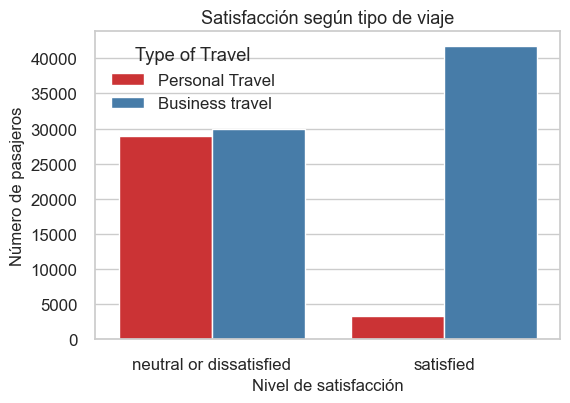

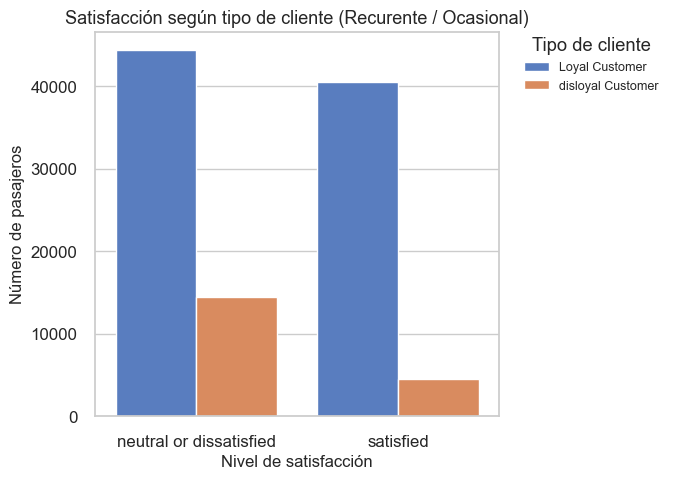


**💬 Interpretación visual:**

- En el primer gráfico (**Tipo de viaje**), se observa que los pasajeros de **viajes de negocios (Business Travel)**  
  presentan una mayor proporción de satisfacción que los de **viajes personales (Personal Travel)**.  
  Esto podría indicar que la aerolínea ofrece un mejor servicio o más beneficios en viajes de negocios.  

- En el segundo gráfico (**Tipo de cliente**), los **clientes recurrentes (Loyal Customers)**  
  muestran una satisfacción significativamente mayor frente a los **nuevos clientes**.  
  Este patrón sugiere que la fidelización y la experiencia previa influyen positivamente  
  en la percepción del servicio.  

- Estos hallazgos son importantes porque permiten **segmentar estrategias de mejora**  
  y entender qué tipo de pasajero contribuye más al nivel global de satisfacción.


In [258]:
# ===================================
# 5. Análisis bivariado: Satisfacción vs variables categóricas (Tipo de viaje, Tipo de cliente)
# ===================================


# --- Gráfico 1: Satisfacción según tipo de viaje ---
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="satisfaction", hue="Type of Travel", palette="Set1")
plt.title("Satisfacción según tipo de viaje", fontsize=13)
plt.xlabel("Nivel de satisfacción")
plt.ylabel("Número de pasajeros")
plt.show()

# --- Gráfico 2: Satisfacción según tipo de cliente ---
plt.figure(figsize=(7,5))
sns.countplot(data=df, x="satisfaction", hue="Customer Type", palette="muted")
plt.title("Satisfacción según tipo de cliente (Recurente / Ocasional)", fontsize=13)
plt.xlabel("Nivel de satisfacción")
plt.ylabel("Número de pasajeros")

# 🔧 Mover la leyenda fuera del gráfico
plt.legend(
    title="Tipo de cliente",
    bbox_to_anchor=(1.05, 1),  # posición fuera del eje derecho
    loc="upper left",
    borderaxespad=0,
    fontsize=9
)

plt.tight_layout()

plt.show()

# --- Comentario interpretativo ---
display(Markdown(
"""
**💬 Interpretación visual:**

- En el primer gráfico (**Tipo de viaje**), se observa que los pasajeros de **viajes de negocios (Business Travel)**  
  presentan una mayor proporción de satisfacción que los de **viajes personales (Personal Travel)**.  
  Esto podría indicar que la aerolínea ofrece un mejor servicio o más beneficios en viajes de negocios.  

- En el segundo gráfico (**Tipo de cliente**), los **clientes recurrentes (Loyal Customers)**  
  muestran una satisfacción significativamente mayor frente a los **nuevos clientes**.  
  Este patrón sugiere que la fidelización y la experiencia previa influyen positivamente  
  en la percepción del servicio.  

- Estos hallazgos son importantes porque permiten **segmentar estrategias de mejora**  
  y entender qué tipo de pasajero contribuye más al nivel global de satisfacción.
"""
))


## **Paso 6: Análisis de Outliers**

Los outliers son valores extremos que se alejan del rango central de las observaciones de los datos.
Su detección es clave para garantizar la calidad del modelo, ya que pueden distorsionar las medias,
las varianzas y el rendimiento del aprendizaje automático.
En los boxplots se representan como puntos fuera de los “bigotes” (whiskers),
que se extienden hasta ±1.5 veces el rango intercuartílico (IQR).

Estos valores pueden ser errores o reflejar casos reales, como vuelos con grandes retrasos.


### Interpretación de los boxplots

- Los puntos fuera de los bigotes son valores extremos.
- En las variables de retrasos, estos valores son esperables y reales.
- No se eliminan directamente, pero pueden tratarse mediante:
  - **Winsorización**: limitar valores al percentil 1% y 99%.
  - **Transformación logarítmica**: comprimir la escala de variables con colas largas.


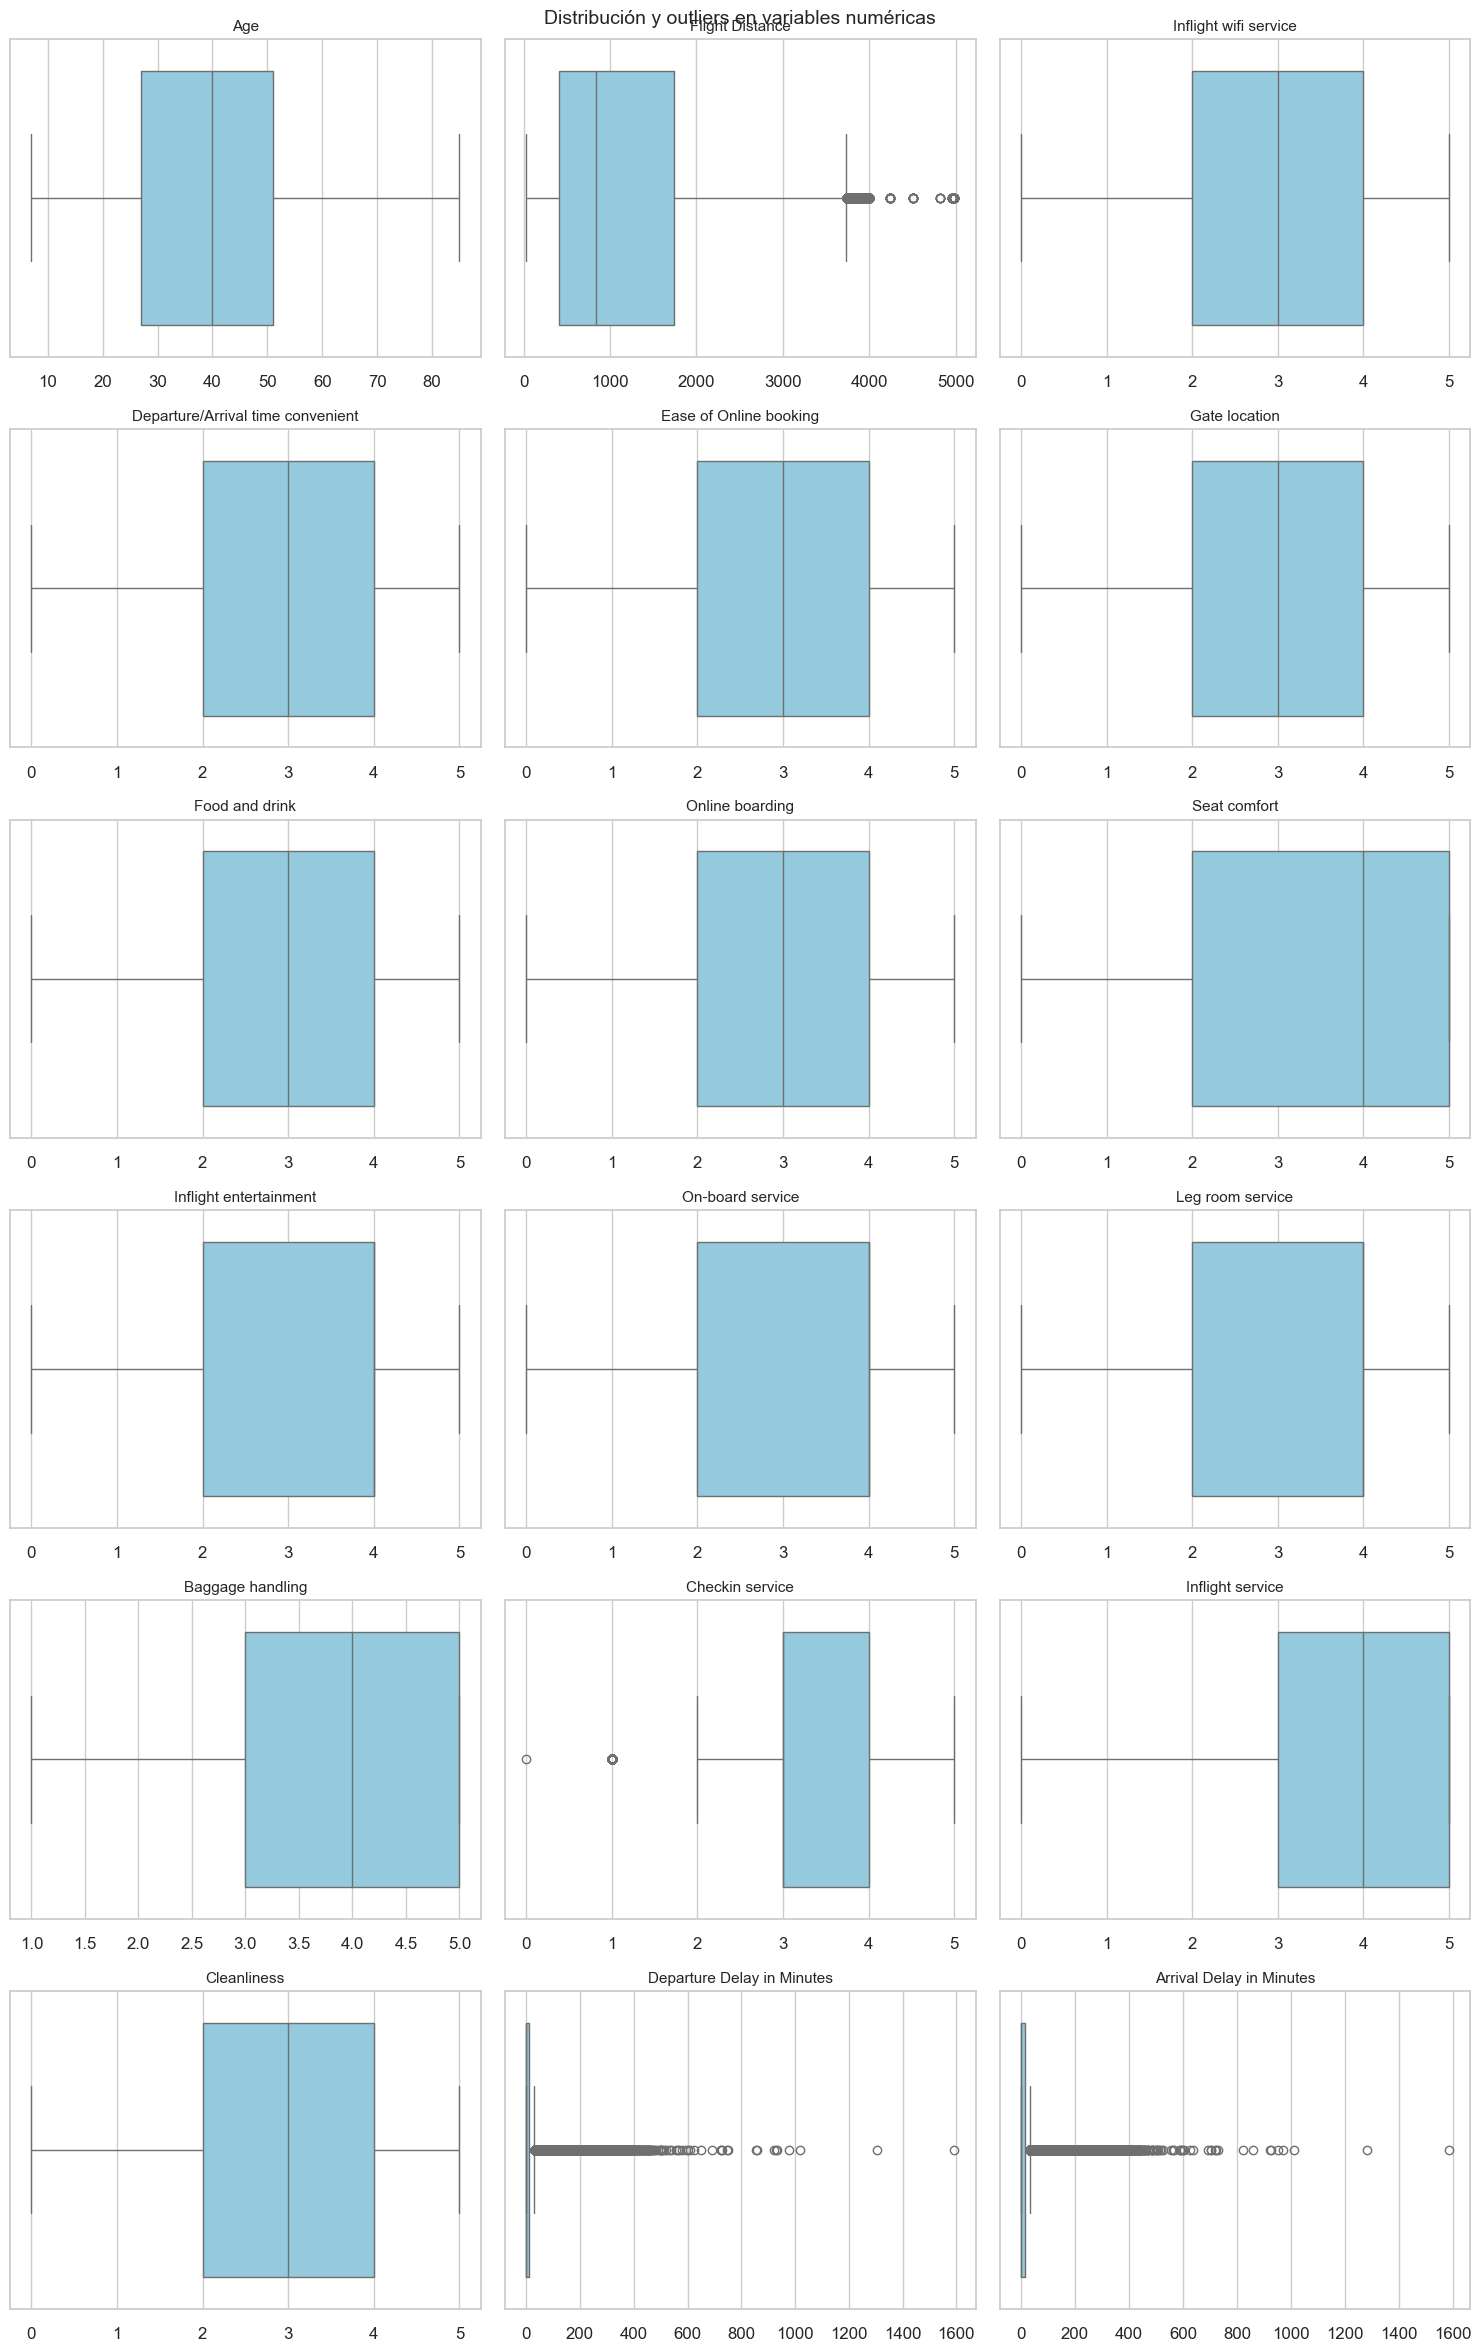


**💬 Interpretación visual:**

- Se observan **valores extremos** especialmente en variables como  
  `Departure Delay in Minutes`, `Arrival Delay in Minutes` y `Flight Distance`.  
- Estos outliers reflejan **situaciones reales de operación aérea**,  
  como vuelos con grandes retrasos o distancias muy largas.  
- En lugar de eliminarse directamente, se tratarán con técnicas como:
  - **Winsorización** → limitar los valores a percentiles (por ejemplo, 1%–99%).  
  - **Transformación logarítmica** → comprimir la escala de las distribuciones sesgadas.  
- Esto preserva la información y evita sesgos en las métricas de los modelos.


In [259]:
# ===================================
# 6. Outliers 
# Análisis univariado: Variables numéricas
# ===================================

# Visualización de outlier

'''
for col in df.select_dtypes(include=['int64', 'float64']):
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f"Outliers en {col}")
    plt.xlabel(col)
    plt.ylabel("Valor")
    plt.show()
    '''

# --- Seleccionar solo variables numéricas ---
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# --- Visualización en cuadrícula para mejor legibilidad ---
n_cols = 3
n_rows = int(np.ceil(len(num_cols) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(x=df[col], ax=axes[i], color="skyblue")
    axes[i].set_title(col, fontsize=11)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Eliminar ejes vacíos si sobran
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Distribución y outliers en variables numéricas", fontsize=14)
plt.tight_layout()
plt.show()


# --- Comentario interpretativo ---
display(Markdown(
"""
**💬 Interpretación visual:**

- Se observan **valores extremos** especialmente en variables como  
  `Departure Delay in Minutes`, `Arrival Delay in Minutes` y `Flight Distance`.  
- Estos outliers reflejan **situaciones reales de operación aérea**,  
  como vuelos con grandes retrasos o distancias muy largas.  
- En lugar de eliminarse directamente, se tratarán con técnicas como:
  - **Winsorización** → limitar los valores a percentiles (por ejemplo, 1%–99%).  
  - **Transformación logarítmica** → comprimir la escala de las distribuciones sesgadas.  
- Esto preserva la información y evita sesgos en las métricas de los modelos.
"""
))
    


## **Paso 7: Winsorización - Tramiento de outliers**

En el análisis anterior de los valores atípicos del dataset observamos en la siguientes variables:

- **Departure Delay in Minutes** → Retrasos en la salida.  
- **Arrival Delay in Minutes** → Retrasos en la llegada.  
- **Flight Distance** → Distancia total del vuelo.

### 🔍 Interpretación de los outliers

- En las variables de retraso, los outliers representan **vuelos con demoras extremas**, 
  que pueden deberse a causas operativas (clima, mantenimiento, congestión aérea).  
  Estos casos son poco frecuentes pero **reales**, no errores, por lo que no deben eliminarse.
  
- En la variable **Flight Distance**, los outliers reflejan **vuelos muy largos**, 
  que igualmente son legítimos, ya que la aerolínea puede operar rutas de distinta duración.

Por tanto, **no eliminamos los valores atípicos**, sino que aplicamos una **winsorización**:
recortamos los valores extremos al percentil 1 % y 99 % de cada distribución.  
Esto reduce su influencia estadística sin perder información representativa.



### 💬 Nota técnica: Por qué aplicamos Winsorización en lugar del método IQR

Tras la detección de valores atípicos en las variables **Departure Delay in Minutes**,  
**Arrival Delay in Minutes** y **Flight Distance**, se decidió aplicar **winsorización**  
en lugar de eliminar los valores extremos mediante el método del rango intercuartílico (IQR).

#### 🔹 Winsorización
- Sustituye los valores extremos por los límites de percentiles definidos (en este caso, 1% y 99%).
- Mantiene **todas las filas del dataset**, preservando la información de cada vuelo.
- Es ideal cuando los valores atípicos **representan casos reales**, no errores de registro.

#### 🔹 Método IQR
- Considera *outliers* los valores fuera del rango `[Q1 - 1.5×IQR, Q3 + 1.5×IQR]`.
- Elimina las filas que contienen dichos valores.
- Es útil cuando los outliers son **errores evidentes o inconsistencias** en los datos.

#### ⚖️ Comparación aplicada a este dataset
En este caso, los valores atípicos no corresponden a errores, sino a **situaciones reales**:
- Vuelos con retrasos muy largos (debido a condiciones operativas o meteorológicas).  
- Rutas intercontinentales con mayor distancia de vuelo.  

Eliminar estas observaciones con el método IQR habría reducido significativamente el tamaño del dataset  
y eliminado información relevante sobre **la relación entre los retrasos extremos y la insatisfacción del cliente**.

Por tanto, la **winsorización** es el método más adecuado porque:
- Conserva la integridad del dataset.  
- Reduce la influencia de valores extremos en las medias y correlaciones.  
- Mantiene la representatividad de los casos reales en el modelado posterior.



In [260]:
# ===================================
# 7. Winsorización - Tratamiento de outliers
# ===================================

# Winsorización de variables con outliers
cols_winsor = ["Departure Delay in Minutes", "Arrival Delay in Minutes", "Flight Distance"]

for col in cols_winsor:
    lower, upper = df[col].quantile([0.01, 0.99])
    df[col] = np.clip(df[col], lower, upper)

print("✅ Winsorización aplicada en columnas:", cols_winsor)

# Verificar rango tras winsorización
df[cols_winsor].describe(percentiles=[0.01, 0.5, 0.99])


✅ Winsorización aplicada en columnas: ['Departure Delay in Minutes', 'Arrival Delay in Minutes', 'Flight Distance']


,Departure Delay in Minutes,Arrival Delay in Minutes,Flight Distance
count,103904.000000,103594.000000,103904.000000
mean,13.965996,14.309719,1188.623143
std,31.215555,31.620373,994.112961
min,0.000000,0.000000,101.000000
1%,0.000000,0.000000,101.000000
50%,0.000000,0.000000,843.000000
99%,181.940900,184.000000,3882.000000
max,181.970000,184.000000,3882.000000


## **Paso 8: Limpieza final (Revisión nulos y duplicados tras tratamiento valores atípicos)**

- **Eliminación (`dropna`)** → adecuada si los valores nulos son escasos (por ejemplo, < 1 % del total).  
- **Imputación (`fillna`)** → recomendable si los nulos afectan a variables importantes.  
  Se pueden reemplazar por la **media** o la **mediana** según la distribución:
  - *Media:* útil para distribuciones normales.
  - *Mediana:* preferible cuando hay asimetría o valores extremos.

En este caso, los nulos se imputan con la **mediana**, ya que algunas variables, como los retrasos, 
no siguen una distribución simétrica.

### 🔍 Interpretación final del tratamiento

Después del tratamiento:

- Las variables de retraso y distancia ya no tienen valores extremos que distorsionen los análisis estadísticos.
- Los valores nulos se han imputado con la mediana para mantener la consistencia.
- Se eliminaron los duplicados, garantizando un dataset único y coherente.

A partir de este punto, el dataset queda **listo para la fase de análisis exploratorio profundo**, 
donde realizaremos:
- Los **KDE plots** por clases de satisfacción (para estudiar la distribución de variables numéricas).  
- La **matriz de correlación**, para evaluar la relación entre características y evitar multicolinealidad.





In [261]:
# ===================================
# 8. Limpieza final (Revisión nulos y duplicados tras tratamiento valores atípicos)
# ===================================

# Revisión y tratamiento de valores nulos tras winsorización
nulos = df.isna().sum()
print("Valores nulos detectados:\n", nulos[nulos > 0] if nulos.sum() > 0 else "No hay valores nulos.")

# Imputar nulos con la mediana
for col in df.columns:
    if df[col].isna().sum() > 0:
        median_value = df[col].median()
        df[col] = df[col].fillna(median_value)
        print(f"Nulos imputados en {col} con mediana ({median_value:.2f}).")

# Ver total de valores faltantes por columna
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])
# No tenemos valores nulos

# Revisión y eliminación de duplicados
dupes = df.duplicated().sum()
print(f"\nFilas duplicadas detectadas: {dupes}")

if dupes > 0:
    df = df.drop_duplicates()
    print("Duplicados eliminados correctamente.")

# Verificación de coherencia final
print("\n✅ Verificación del dataset:")
print(f"Tamaño final: {df.shape}")
print(f"Valores nulos restantes: {df.isna().sum().sum()}")
print(f"Duplicados restantes: {df.duplicated().sum()}")


Valores nulos detectados:
 Arrival Delay in Minutes    310
dtype: int64
Nulos imputados en Arrival Delay in Minutes con mediana (0.00).
Series([], dtype: int64)

Filas duplicadas detectadas: 0

✅ Verificación del dataset:
Tamaño final: (103904, 23)
Valores nulos restantes: 0
Duplicados restantes: 0


## **Paso 9:  Análisis de densidad de variables numéricas (KDE plots por clase de satisfacción)**

Los **KDE plots** (*Kernel Density Estimation*) muestran la distribución de probabilidad de una variable numérica.  
A diferencia de los histogramas, generan una curva suavizada que permite comparar la forma de las distribuciones entre categorías o las principales variables numéricas, divididas por la variable objetivo `satisfaction` (*Satisfied* vs *Neutral or Dissatisfied*).

Esto nos permite observar si las características numéricas tienden a comportarse de manera distinta según el nivel de satisfacción del pasajero. Al representarlos por clases de la variable objetivo, observamos si las distribuciones difieren entre pasajeros satisfechos e insatisfechos.

Si las curvas están separadas → variable con capacidad discriminante.  
Si se solapan → variable menos útil para el modelo.


### 🔍 Interpretación

Podemos observar:
- Variables como **Online boarding**, **Seat comfort** y **Inflight wifi service** presentan curvas muy diferenciadas según la satisfacción del pasajero, lo que sugiere que son **variables predictoras relevantes**.
- En cambio, **Age** o **Flight Distance** muestran distribuciones similares en ambas clases, por lo que su influencia podría ser menor.



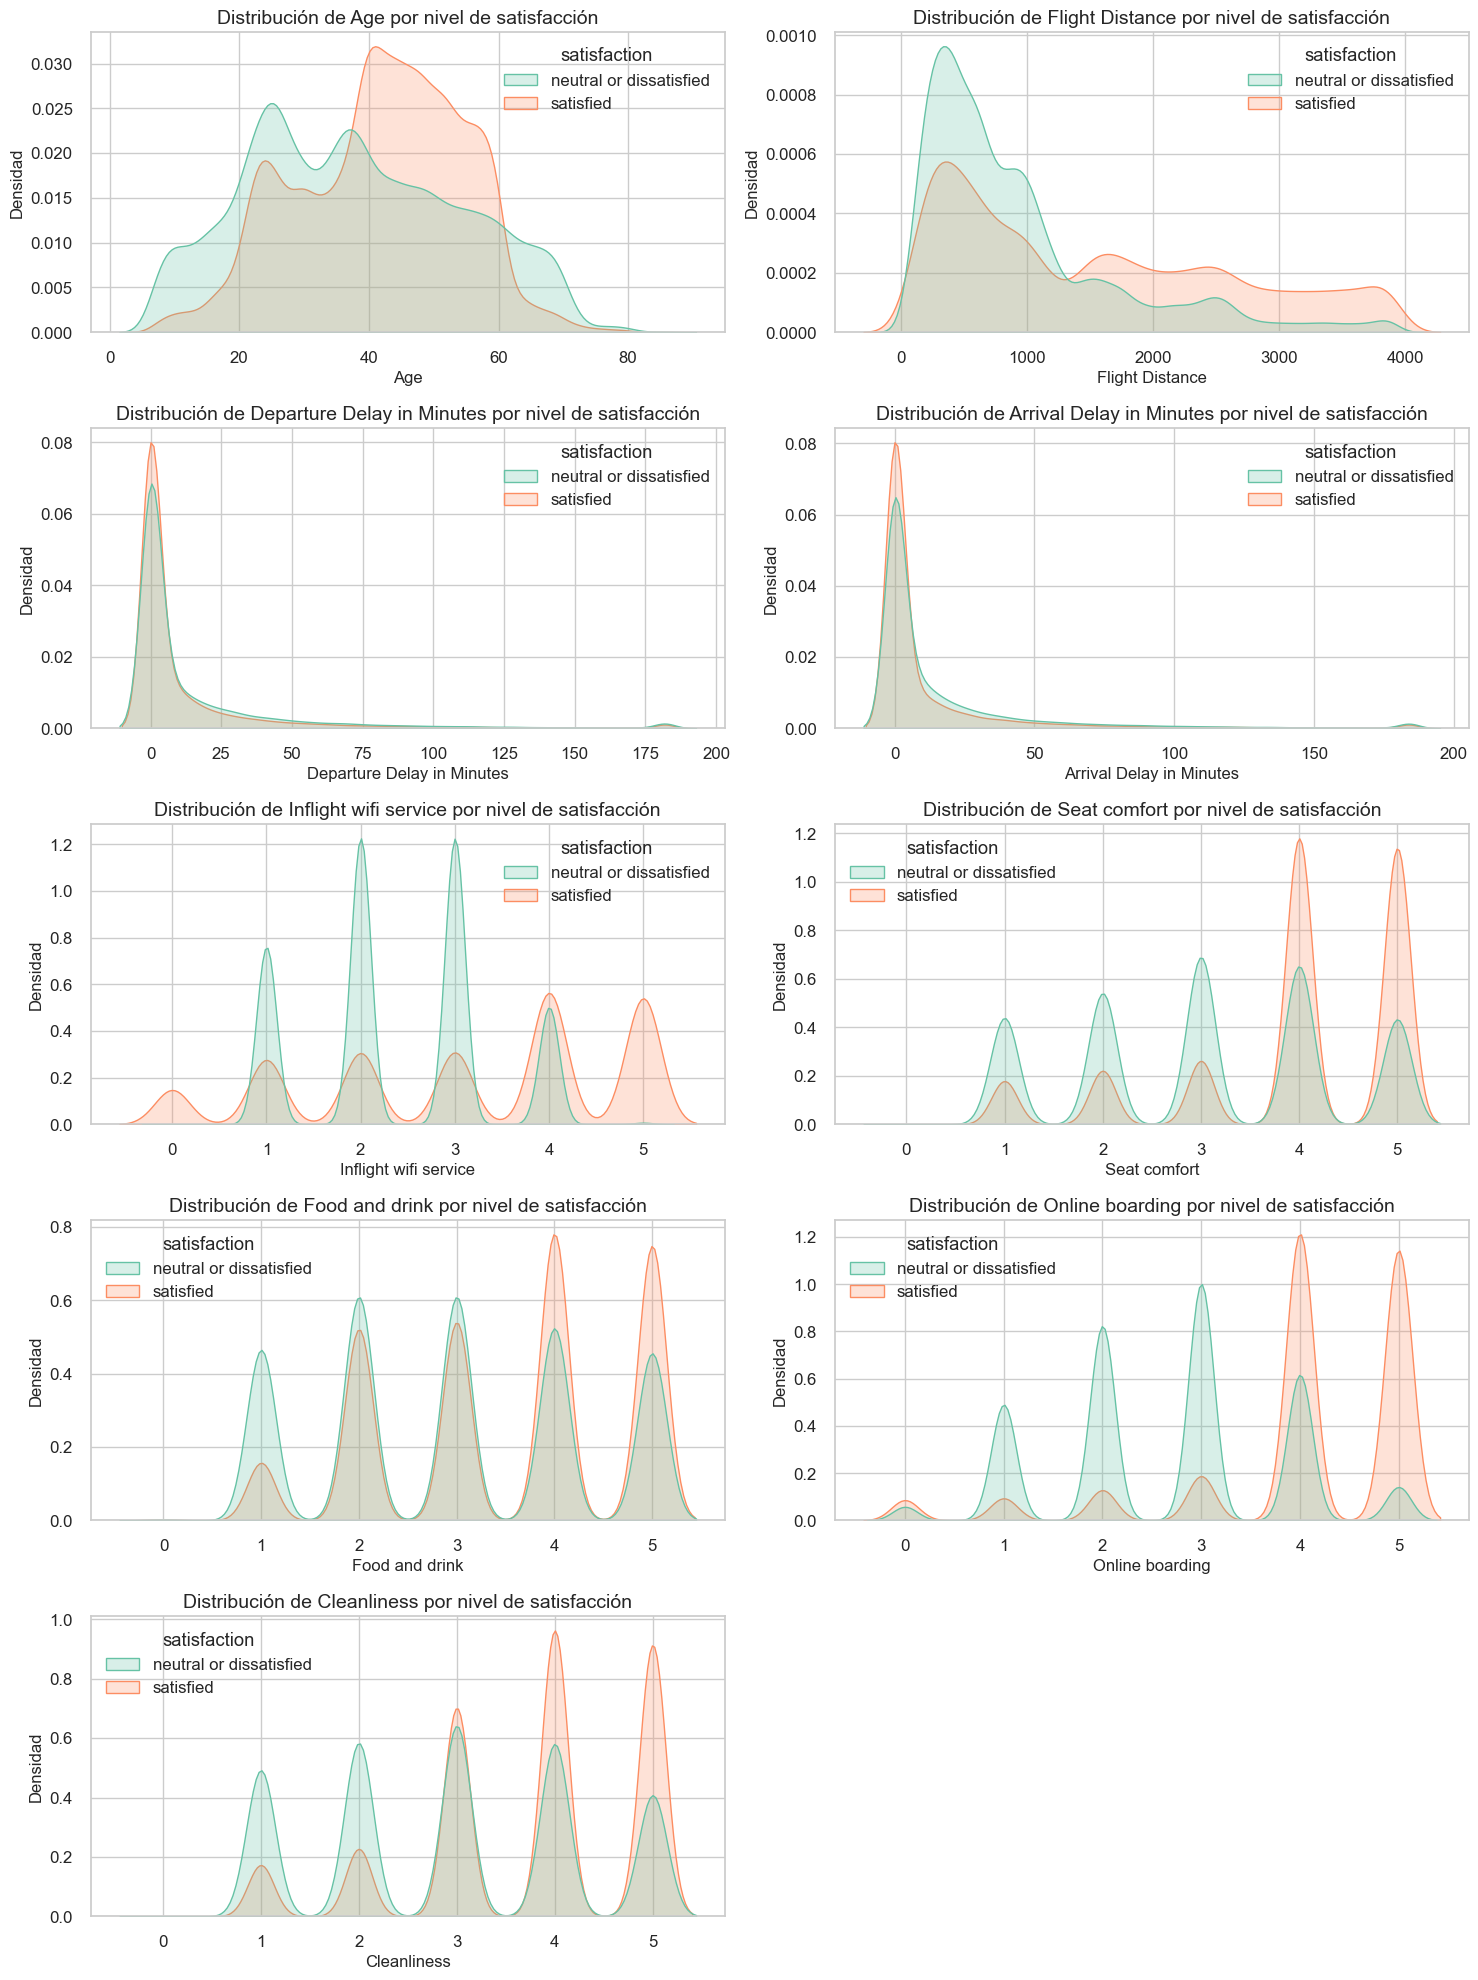


**💬 Interpretación visual:**

- Las curvas muestran **diferencias notables entre las clases** en varias variables.  
  Por ejemplo:
  - En *Online boarding*, los pasajeros **satisfechos** tienden a concentrarse en valores altos,  
    lo que sugiere que la eficiencia en el embarque influye positivamente en la satisfacción.  
  - En *Flight Distance*, ambas clases presentan distribuciones similares,  
    por lo que esta variable probablemente **no sea muy discriminante**.  
  - En *Departure* y *Arrival Delay*, los pasajeros **insatisfechos** se concentran más en retrasos altos.  

- En general, estas observaciones permiten **identificar las variables más relevantes**
  que podrían tener un mayor impacto en los modelos de clasificación.


In [262]:
# ===================================
# 9. Análisis de densidad de variables numéricas (KDE plots por clase de satisfacción)
# ===================================


# Variables numéricas principales a analizar
num_cols = [
    "Age", "Flight Distance", 
    "Departure Delay in Minutes", "Arrival Delay in Minutes",
    "Inflight wifi service", "Seat comfort", 
    "Food and drink", "Online boarding", "Cleanliness"
]

# Crear los KDE plots por clase de satisfacción
plt.figure(figsize=(15, 20))
for i, col in enumerate(num_cols, 1):
    plt.subplot(5, 2, i)
    sns.kdeplot(data=df, x=col, hue="satisfaction", fill=True, common_norm=False, palette="Set2")
    plt.title(f"Distribución de {col} por nivel de satisfacción")
    plt.xlabel(col)
    plt.ylabel("Densidad")
plt.tight_layout()
plt.show()

# --- Comentario interpretativo ---
display(Markdown(
"""
**💬 Interpretación visual:**

- Las curvas muestran **diferencias notables entre las clases** en varias variables.  
  Por ejemplo:
  - En *Online boarding*, los pasajeros **satisfechos** tienden a concentrarse en valores altos,  
    lo que sugiere que la eficiencia en el embarque influye positivamente en la satisfacción.  
  - En *Flight Distance*, ambas clases presentan distribuciones similares,  
    por lo que esta variable probablemente **no sea muy discriminante**.  
  - En *Departure* y *Arrival Delay*, los pasajeros **insatisfechos** se concentran más en retrasos altos.  

- En general, estas observaciones permiten **identificar las variables más relevantes**
  que podrían tener un mayor impacto en los modelos de clasificación.
"""
))


## **Paso 10: Matriz de correlación**

La matriz de correlación nos permite identificar relaciones lineales entre variables numéricas.  
Correlaciones muy altas (|r| > 0.8) pueden generar multicolinealidad, afectando a modelos lineales.

Esto ayuda a:
- Detectar variables redundantes (altamente correlacionadas entre sí) o poco informativas**.  
- Comprender cuáles están más relacionadas con la variable objetivo (si la convertimos a numérica).  
- Reducir el riesgo de **multicolinealidad**, que puede afectar el rendimiento de algunos modelos.

Aquí representamos la correlación de Pearson entre las variables numéricas del dataset.

Convertimos la variable `satisfaction` a valores numéricos:
- *Satisfied → 1*  
- *Neutral or Dissatisfied → 0*


### 🔍 Interpretación

- Las variables fuertemente correlacionadas aportan información redundante. 
- En modelos basados en árboles (RandomForest, XGBoost, etc.), esto no suele afectar.  
- En modelos lineales (SVM, Logistic Regression), puede perjudicar el rendimiento, 
por lo que conviene eliminar o combinar las variables correlacionadas.

- Las variables con **mayor correlación positiva** con la satisfacción son:  
  **Online boarding**, **Seat comfort**, **Inflight entertainment**, y **Cleanliness**.  
  Esto indica que una mejor experiencia en estos aspectos se asocia con pasajeros más satisfechos.

- Variables con **correlación negativa** (aunque baja) reflejan condiciones que tienden a generar insatisfacción,  
  como mayores **retrasos de llegada o salida**.

- No se observan correlaciones extremadamente altas entre variables independientes,  
  lo que indica que el riesgo de multicolinealidad es bajo.



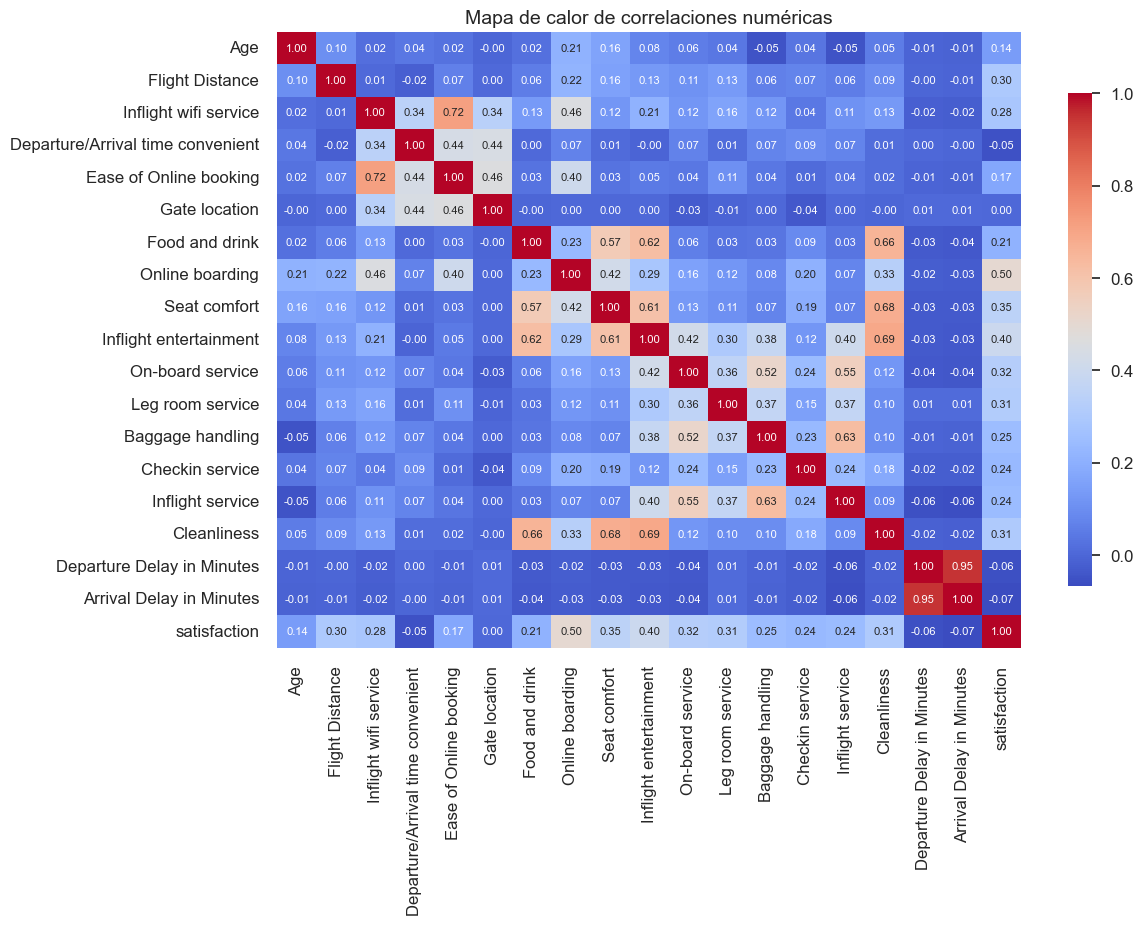

📊 Correlaciones con la variable objetivo:
satisfaction                         1.000000
Online boarding                      0.503557
Inflight entertainment               0.398059
Seat comfort                         0.349459
On-board service                     0.322383
Leg room service                     0.313131
Cleanliness                          0.305198
Flight Distance                      0.299167
Inflight wifi service                0.284245
Baggage handling                     0.247749
Inflight service                     0.244741
Checkin service                      0.236174
Food and drink                       0.209936
Ease of Online booking               0.171705
Age                                  0.137167
Gate location                        0.000682
Departure/Arrival time convenient   -0.051601
Departure Delay in Minutes          -0.058261
Arrival Delay in Minutes            -0.067163
Name: satisfaction, dtype: float64


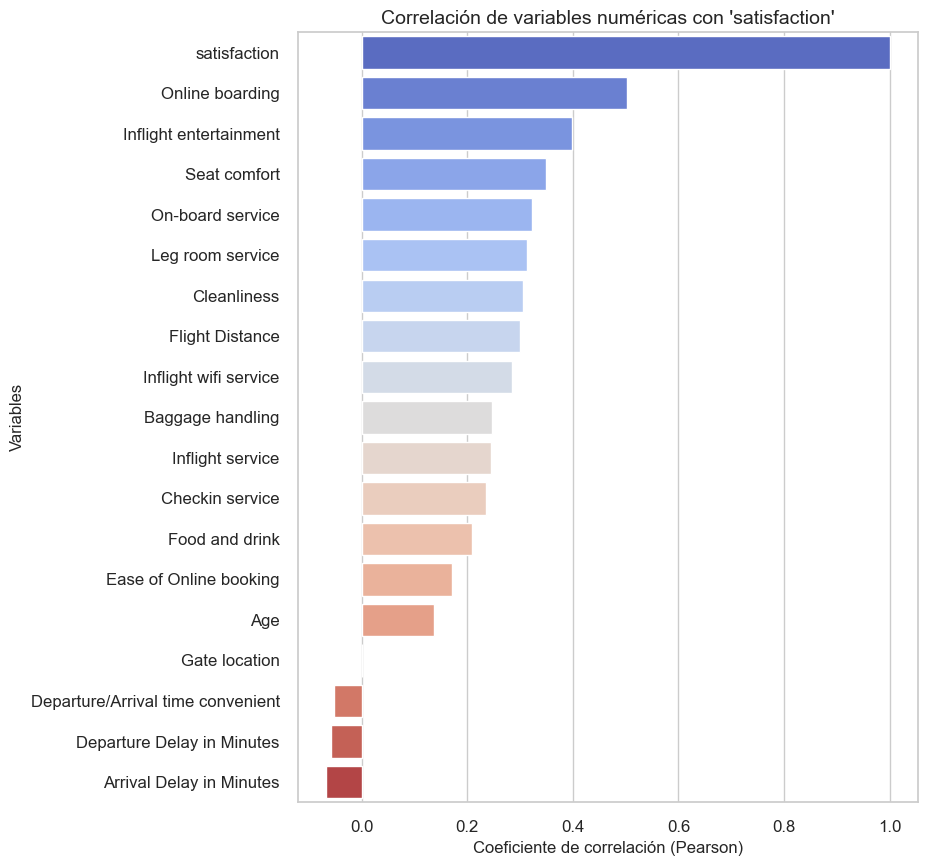


**💬 Interpretación visual:**

- Variables como **Online boarding**, **Inflight entertainment**, **Seat comfort** y  
  **Cleanliness** muestran correlaciones positivas altas con `satisfaction`,  
  lo que indica que influyen fuertemente en la percepción del pasajero.  
- Por el contrario, **Departure Delay** y **Arrival Delay** presentan correlaciones negativas,  
  sugiriendo que los retrasos reducen significativamente la satisfacción.  
- Este patrón es coherente con la lógica de negocio:  
  una mejor experiencia en vuelo y puntualidad se traducen en clientes más satisfechos.  

Estas correlaciones guiarán la **selección de características** para los modelos predictivos,
permitiendo centrarse en las variables más relevantes y evitar redundancias.


In [263]:
# ===================================
# 10. Análisis de correlaciones
# ===================================

# Creamos una copia del DataFrame original para no modificar 'df'
# (Esto nos permite convertir la variable 'satisfaction' a numérica solo para el análisis de correlación,
#  manteniendo el dataset original intacto para los pasos posteriores del EDA y la exportación.)
df_corr = df.copy()
df_corr["satisfaction"] = df_corr["satisfaction"].map({
    "satisfied": 1, 
    "neutral or dissatisfied": 0
})

# Seleccionar solo las columnas numéricas
df_num = df_corr.select_dtypes(include=["int64", "float64"])

# --- Heatmap de correlaciones numéricas ---
plt.figure(figsize=(12, 8))
sns.heatmap(
    df_num.corr(),
    cmap="coolwarm",
    annot=True,            # muestra los valores dentro de cada celda
    fmt=".2f",             # formato con 2 decimales
    annot_kws={"size": 8}, # tamaño del texto
    cbar_kws={'shrink': 0.8}
)
plt.title("Mapa de calor de correlaciones numéricas", fontsize=14)
plt.show()

# --- Correlaciones con la variable objetivo ---
target_col = "satisfaction"
correlations = df_num.corr()[target_col].sort_values(ascending=False)

print("📊 Correlaciones con la variable objetivo:")
print(correlations)

# --- Visualización en gráfico de barras ---
plt.figure(figsize=(8, 10))
sns.barplot(
    x=correlations.values,
    y=correlations.index,
    hue=correlations.index,   # usar cada variable como hue
    palette="coolwarm",
    dodge=False,
    legend=False
)

plt.title(f"Correlación de variables numéricas con '{target_col}'", fontsize=14)
plt.xlabel("Coeficiente de correlación (Pearson)")
plt.ylabel("Variables")
plt.show()

# --- Comentario interpretativo ---
display(Markdown(
"""
**💬 Interpretación visual:**

- Variables como **Online boarding**, **Inflight entertainment**, **Seat comfort** y  
  **Cleanliness** muestran correlaciones positivas altas con `satisfaction`,  
  lo que indica que influyen fuertemente en la percepción del pasajero.  
- Por el contrario, **Departure Delay** y **Arrival Delay** presentan correlaciones negativas,  
  sugiriendo que los retrasos reducen significativamente la satisfacción.  
- Este patrón es coherente con la lógica de negocio:  
  una mejor experiencia en vuelo y puntualidad se traducen en clientes más satisfechos.  

Estas correlaciones guiarán la **selección de características** para los modelos predictivos,
permitiendo centrarse en las variables más relevantes y evitar redundancias.
"""
))


## **Paso 11: Exportación del dataset limpio para modelado**

Tras completar el análisis exploratorio y el tratamiento de valores atípicos, nulos y duplicados,  
exportamos el dataset procesado para utilizarlo en las siguientes fases del proyecto de clasificación.

El dataset limpio incluirá únicamente las columnas relevantes, sin valores faltantes ni duplicados,  
y con las variables numéricas tratadas (outliers corregidos mediante winsorización).

In [264]:
# Exportación del dataset limpio

# Creamos el directorio de salida si no existe
import os
os.makedirs("../data/processed", exist_ok=True)

# Guardamos el dataset limpio
output_path = "../data/processed/cleaned_airline_satisfaction.csv"
df.to_csv(output_path, index=False)

# Confirmación
print(f"✅ Dataset limpio exportado correctamente: {output_path}")
print(f"Tamaño final: {df.shape}")
print(f"Columnas exportadas: {df.columns.tolist()}")


✅ Dataset limpio exportado correctamente: ../data/processed/cleaned_airline_satisfaction.csv
Tamaño final: (103904, 23)
Columnas exportadas: ['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'satisfaction']


# 🏁 **Conclusiones del Análisis Exploratorio (EDA)**

Durante este análisis se han realizado los siguientes pasos:

1. **Limpieza estructural inicial**: eliminación de columnas irrelevantes (`Unnamed: 0`, `id`), detección de nulos y duplicados.  
2. **Análisis descriptivo**: distribución de la variable objetivo `satisfaction` y su relación con las variables categóricas.  
3. **Detección y tratamiento de outliers** mediante winsorización en las variables de retraso y distancia.  
4. **Limpieza final**: imputación de nulos con la mediana y eliminación de duplicados.  
5. **Exploración visual** con **KDE plots** por clase y **mapa de correlación** para identificar las variables más influyentes.  

### 🔍 Hallazgos clave

- Las variables **Online boarding**, **Seat comfort**, **Inflight entertainment** y **Cleanliness** presentan las correlaciones más altas con la satisfacción.  
- Los **retrasos de salida y llegada** tienen correlación negativa con la satisfacción.  
- No se detecta multicolinealidad fuerte entre las variables numéricas.  
- El dataset final queda **consistente y equilibrado**, listo para su uso en modelado supervisado.

---

## 🚀 Próximos pasos

En el siguiente notebook:

📄 **`02_dataset-split.ipynb`**

- Dividiremos el dataset en subconjuntos de **entrenamiento (80%)** y **validación (20%)**.  
- Prepararemos las versiones **escaladas y no escaladas** según los algoritmos a aplicar.  
- Estableceremos la base para el entrenamiento, validación cruzada y tuning de hiperparámetros en los siguientes notebooks.

---

> 💾 *El archivo exportado se encuentra en la carpeta `../data/processed` con el nombre*  
> **`cleaned_airline_satisfaction.csv`**
